In [864]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline 

In [865]:
#read in csv file with data
df=pd.read_csv('cpl data/all_matches.csv')

#manually change start date to correct type as parse_dates=True didn't work. 
df['start_date'] = pd.to_datetime(df['start_date'])

In [866]:
#Sort data (ball by ball) from first season to last season (in chronological order)
sorted_data = df.sort_values(by=['start_date', 'innings', 'ball'])
df = sorted_data

In [867]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
46113,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.1,Barbados Tridents,St Lucia Zouks,DR Smith,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,caught,DR Smith,NaN,NaN
46114,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.2,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46115,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.3,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46116,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.4,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46117,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.5,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [868]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
72131,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.4,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72132,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.5,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72133,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.6,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72134,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.7,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72135,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,16.1,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72136 entries, 46113 to 72135
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   match_id                72136 non-null  int64         
 1   season                  72136 non-null  int64         
 2   start_date              72136 non-null  datetime64[ns]
 3   venue                   72136 non-null  object        
 4   innings                 72136 non-null  int64         
 5   ball                    72136 non-null  float64       
 6   batting_team            72136 non-null  object        
 7   bowling_team            72136 non-null  object        
 8   striker                 72136 non-null  object        
 9   non_striker             72136 non-null  object        
 10  bowler                  72136 non-null  object        
 11  runs_off_bat            72136 non-null  int64         
 12  extras                  72136 non-null  in

In [870]:
df.size

1586992

In [871]:
df.shape

(72136, 22)

In [872]:
df.dtypes

match_id                           int64
season                             int64
start_date                datetime64[ns]
venue                             object
innings                            int64
ball                             float64
batting_team                      object
bowling_team                      object
striker                           object
non_striker                       object
bowler                            object
runs_off_bat                       int64
extras                             int64
wides                            float64
noballs                          float64
byes                             float64
legbyes                          float64
penalty                          float64
wicket_type                       object
player_dismissed                  object
other_wicket_type                float64
other_player_dismissed           float64
dtype: object

In [873]:
#Add a column for overs:
df['overs'] = np.floor(df['ball']) + 1


In [874]:
#Fix all columns with some non-null values: 

#wides, no balls, byes, legbyes, penalty : if Null => 0 else 1 
#wicket_type: if Null => No wicket 
#player_dismissed: if Null => No dismissal
df = df.fillna({'wides':0.0, 'noballs':0.0, 'byes':0.0, 'legbyes':0.0,
                'penalty':0.0, 'wicket_type':'No wicket', 'player_dismissed':'No dismissal'})

In [875]:
#Drop columns with only null values:
df = df.dropna(axis=1)

In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72136 entries, 46113 to 72135
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   match_id          72136 non-null  int64         
 1   season            72136 non-null  int64         
 2   start_date        72136 non-null  datetime64[ns]
 3   venue             72136 non-null  object        
 4   innings           72136 non-null  int64         
 5   ball              72136 non-null  float64       
 6   batting_team      72136 non-null  object        
 7   bowling_team      72136 non-null  object        
 8   striker           72136 non-null  object        
 9   non_striker       72136 non-null  object        
 10  bowler            72136 non-null  object        
 11  runs_off_bat      72136 non-null  int64         
 12  extras            72136 non-null  int64         
 13  wides             72136 non-null  float64       
 14  noballs           

In [877]:
#Change venues to include country and also to remove duplicate values
#eg: Providence Stadium and Providence Stadium, Guyana
df = df.replace('Providence Stadium', 'Providence Stadium, Guyana')
df = df.replace("Queen's Park Oval, Port of Spain", "Queen's Park Oval, Port of Spain, Trinidad")
df = df.replace('Warner Park, Basseterre', 'Warner Park, Basseterre, St Kitts')
df = df.replace('Sabina Park, Kingston',  'Sabina Park, Kingston, Jamaica')
df = df.replace('Central Broward Regional Park Stadium Turf Ground', 
                'Central Broward Regional Park Stadium Turf Ground, USA')
df = df.replace('Daren Sammy National Cricket Stadium, Gros Islet',
                'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia')
df = df.replace('Brian Lara Stadium, Tarouba', 'Brian Lara Stadium, Tarouba, Trinidad')
df = df.replace('Sir Vivian Richards Stadium, North Sound', 'Sir Vivian Richards Stadium, North Sound, Antigua')
df = df.replace("National Cricket Stadium, St George's", "National Cricket Stadium, St George's, Grenada")

In [878]:
#List of Seasons: 
df['season'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [879]:
#List of Venues: 
df['venue'].unique()

array(['Kensington Oval, Bridgetown', 'Providence Stadium, Guyana',
       'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
       "Queen's Park Oval, Port of Spain, Trinidad",
       'Sir Vivian Richards Stadium, North Sound, Antigua',
       'Sabina Park, Kingston, Jamaica',
       "National Cricket Stadium, St George's, Grenada",
       'Warner Park, Basseterre, St Kitts',
       'Central Broward Regional Park Stadium Turf Ground, USA',
       'Brian Lara Stadium, Tarouba, Trinidad'], dtype=object)

In [880]:
#List of ALL Teams (Not Franchises): 
df['batting_team'].unique()

array(['Barbados Tridents', 'St Lucia Zouks', 'Guyana Amazon Warriors',
       'Trinidad & Tobago Red Steel', 'Antigua Hawksbills',
       'Jamaica Tallawahs', 'St Kitts and Nevis Patriots',
       'Trinbago Knight Riders', 'St Lucia Stars', 'Barbados Royals',
       'St Lucia Kings'], dtype=object)

In [881]:
#Change all Franchise names as indicated above:
df = df.replace('Trinidad & Tobago Red Steel', 'Trinbago Knight Riders')
df = df.replace("Barbados Tridents", "Barbados Royals")
df = df.replace('St Lucia Zouks', 'St Lucia Kings')
df = df.replace('St Lucia Stars', 'St Lucia Kings')

In [882]:
#List of All Franchises: 
df['batting_team'].unique()

array(['Barbados Royals', 'St Lucia Kings', 'Guyana Amazon Warriors',
       'Trinbago Knight Riders', 'Antigua Hawksbills',
       'Jamaica Tallawahs', 'St Kitts and Nevis Patriots'], dtype=object)

In [883]:
# First ball of CPL history:
df.iloc[0]

match_id                                 635215
season                                     2013
start_date                  2013-07-30 00:00:00
venue               Kensington Oval, Bridgetown
innings                                       1
ball                                        0.1
batting_team                    Barbados Royals
bowling_team                     St Lucia Kings
striker                                DR Smith
non_striker                           JL Carter
bowler                                JA Morkel
runs_off_bat                                  0
extras                                        0
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     0.0
penalty                                     0.0
wicket_type                              caught
player_dismissed                       DR Smith
overs                                   

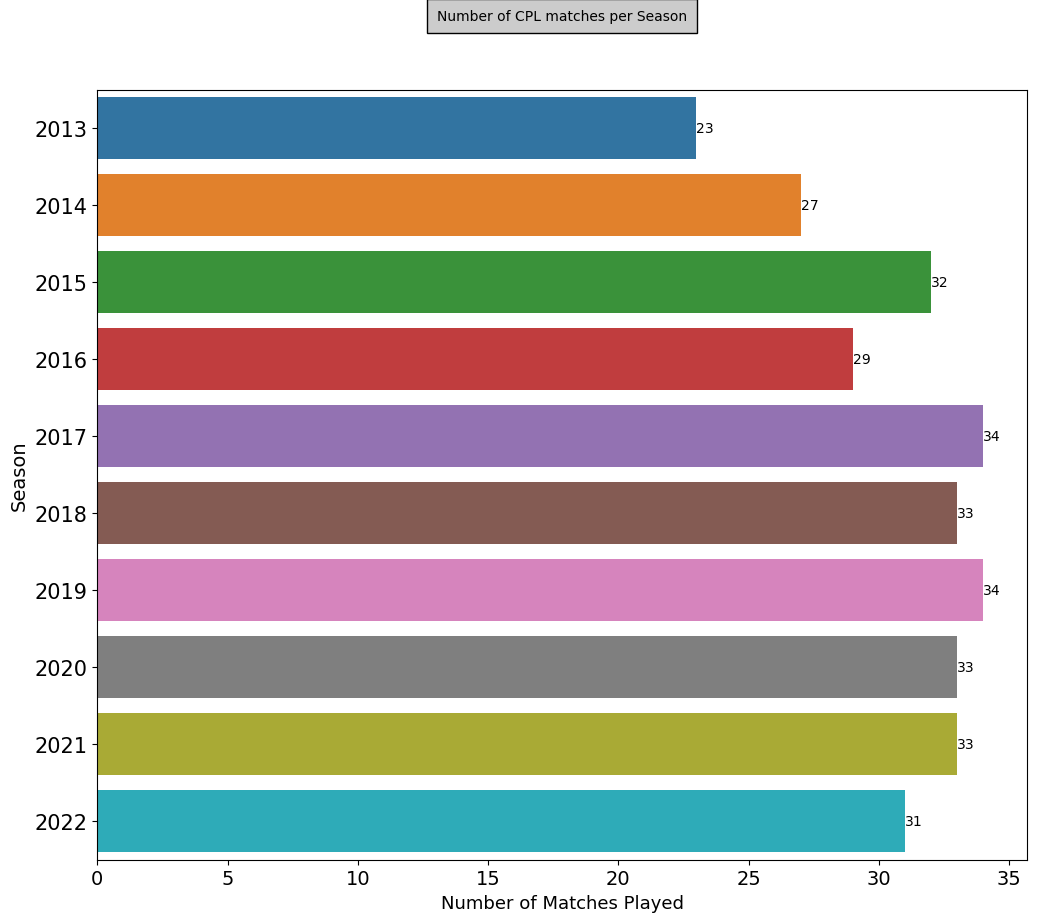

In [884]:
#Bar Chart showing Number of CPL matches played, grouped by season:

#Plot size
plt.figure(figsize=(12,10))

#Group by the match id and season columns
data = df.groupby(['match_id','season'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

#Sort from 2013 - 2022
data = data.sort_index()

plt.title("Number of CPL matches per Season", bbox={'facecolor':'0.8', 'pad':5}, fontsize=10)

bar_chart = sns.barplot(y=data.index,x=data, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

#Label Axes
plt.xlabel('Number of Matches Played', fontsize = 13)
plt.ylabel('Season', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# displaying chart
plt.show()

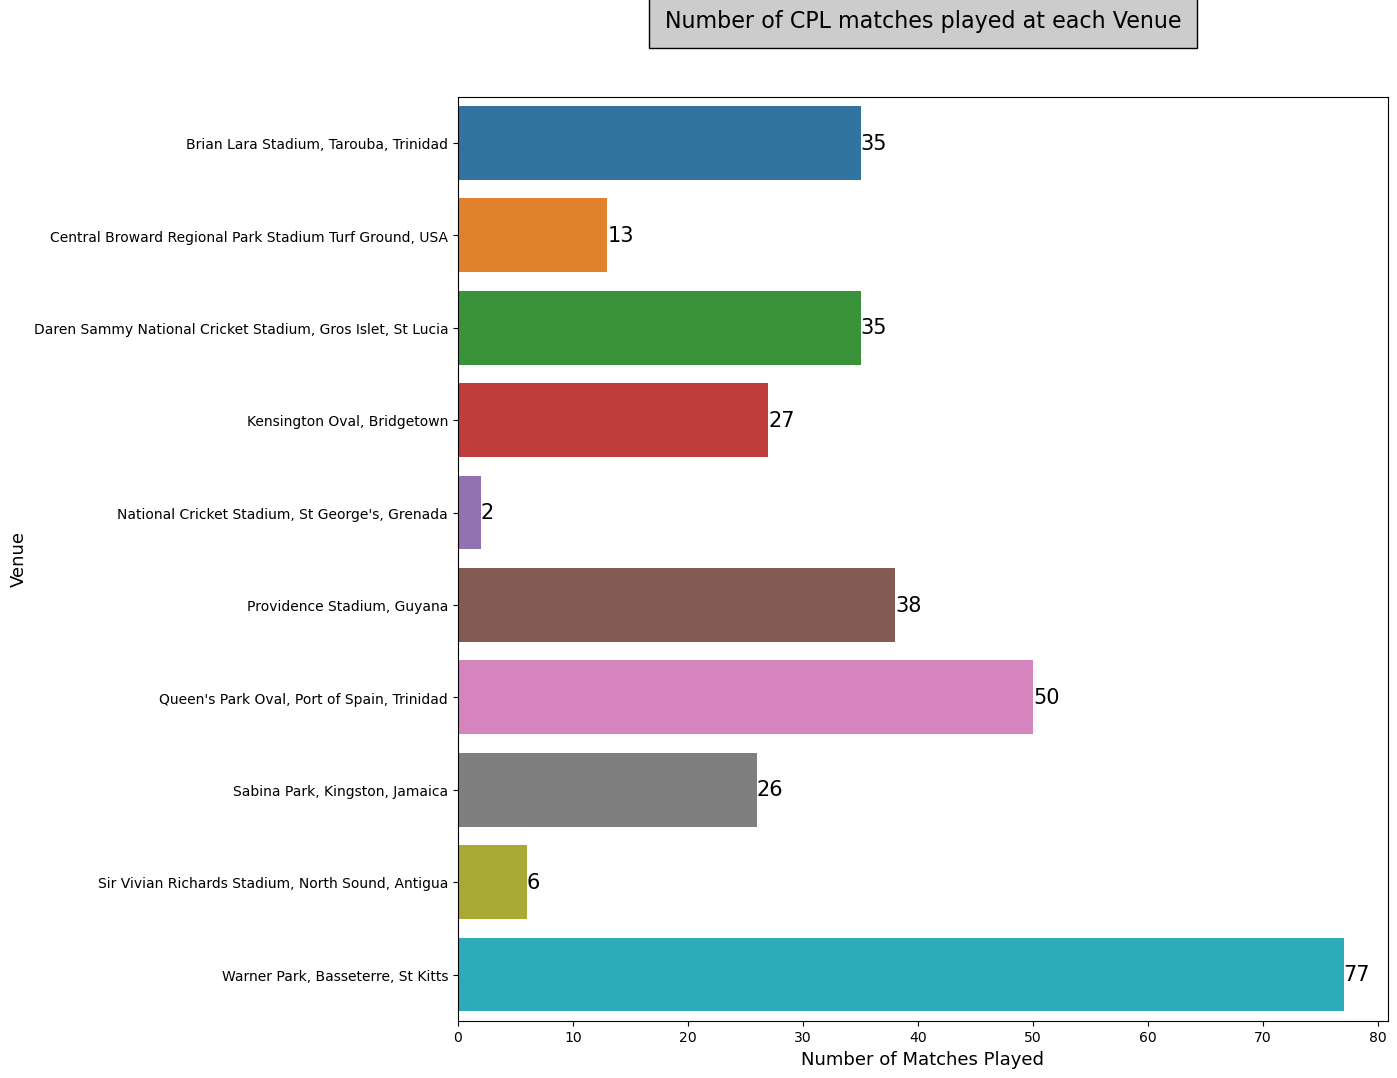

In [885]:
#Bar Chart showing Number of CPL matches played, grouped by Venue:

#Plot size
plt.figure(figsize=(12,12))

#Group by the match id and season columns
data = df.groupby(['match_id','venue'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

#Sort from 2013 - 2022
data = data.sort_index()

plt.title("Number of CPL matches played at each Venue", bbox={'facecolor':'0.8', 'pad':5}, fontsize=16)
rcParams['axes.titlepad'] = 50

bar_chart1 = sns.barplot(y=data.index,x=data)

#Label each bar 
bar_chart1.bar_label(bar_chart1.containers[0], fontsize=15)

#Label Axes
plt.xlabel('Number of Matches Played', fontsize=13)
plt.ylabel('Venue', fontsize=13)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=15)

# displaying chart
plt.show()

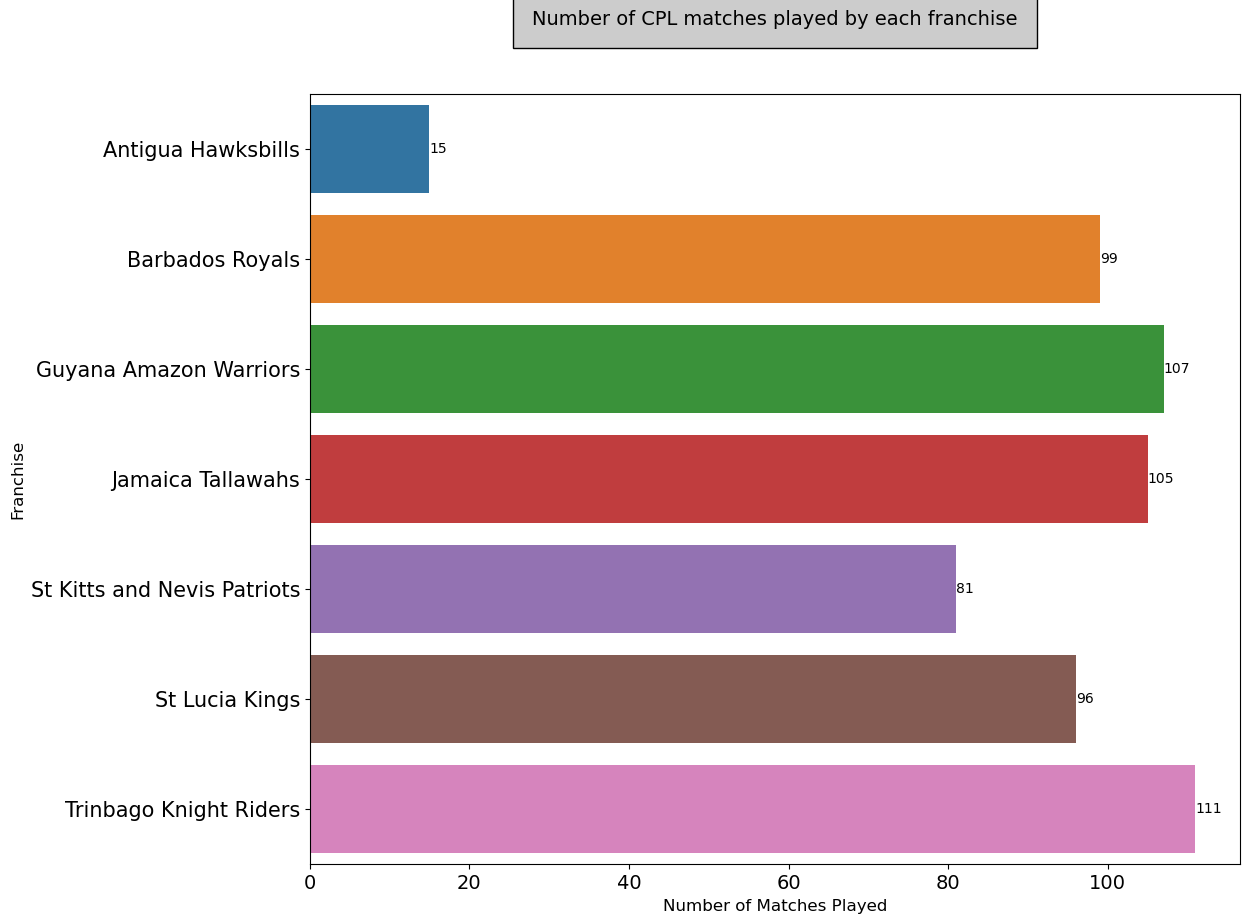

In [886]:
#Bar Chart showing Number of CPL matches played, grouped by Franchise:

#Plot size
plt.figure(figsize=(12,10))

#Group by the match id and season columns
data = df.groupby(['match_id','batting_team'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

#Sort from 2013 - 2022
data = data.sort_index()

plt.title("Number of CPL matches played by each franchise", bbox={'facecolor':'0.8', 'pad':7}, fontsize=14)

bar_chart2 = sns.barplot(y=data.index,x=data, orient='h')

bar_chart2.bar_label(bar_chart2.containers[0])

#Label Axes
plt.xlabel('Number of Matches Played', fontsize=12)
plt.ylabel('Franchise', fontsize=12)

plt.show()

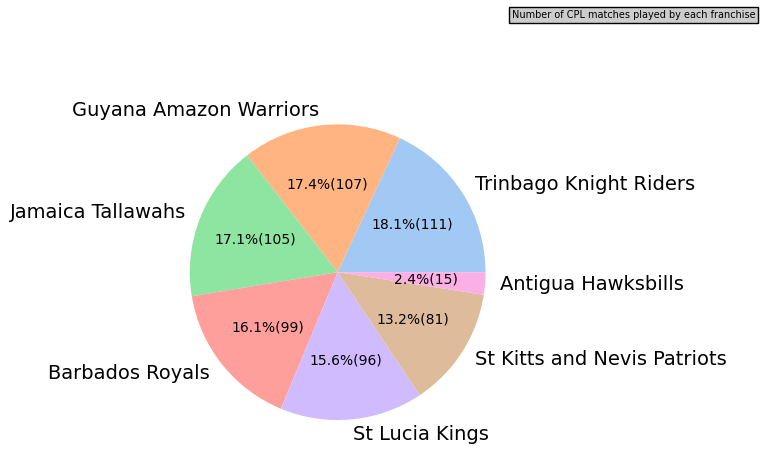

In [887]:
#Pie Chart showing Number of CPL matches played by each franchise:

#Group by the match id and team columns
data = df.groupby(['match_id','batting_team'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

plt.title("Number of CPL matches played by each franchise", bbox={'facecolor':'0.8', 'pad':2}, x =1.3)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(data, labels=data.index, colors=palette_color, \
        autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*data.sum()))
  
# displaying chart
plt.show()

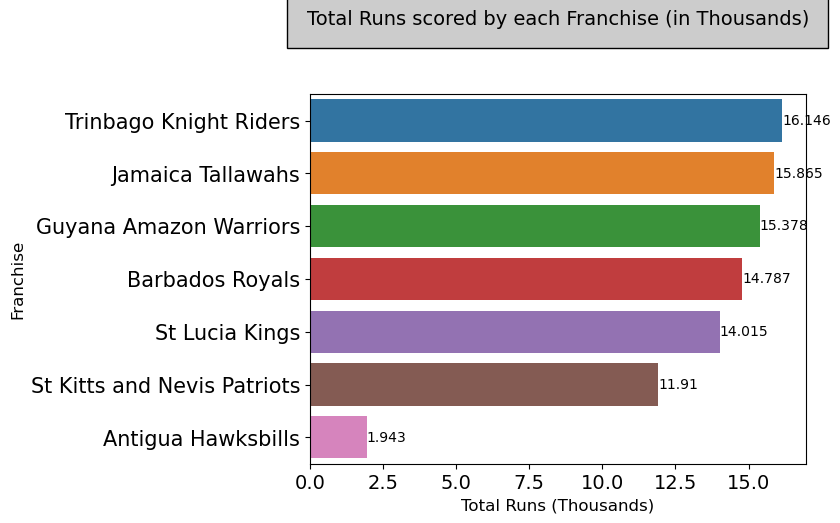

In [888]:
#Total Runs Scored by each Franchise

#Get max runs for each team: sum of runs of the bat and the extras
team_runs = (df.groupby(['batting_team'])['runs_off_bat'].sum() + df.groupby(['batting_team'])['extras'].sum())/1000

#Sort the data in descending order; i.e. most runs first
team_runs = team_runs.sort_values(ascending=False)

plt.title("Total Runs scored by each Franchise (in Thousands)", bbox={'facecolor':'0.8', 'pad':7}, fontsize=14)

bar_chart3 = sns.barplot(y=team_runs.index,x=team_runs, orient='h')

bar_chart3.bar_label(bar_chart3.containers[0])

#Label Axes
plt.xlabel('Total Runs (Thousands)', fontsize=12)
plt.ylabel('Franchise', fontsize=12)

plt.show()

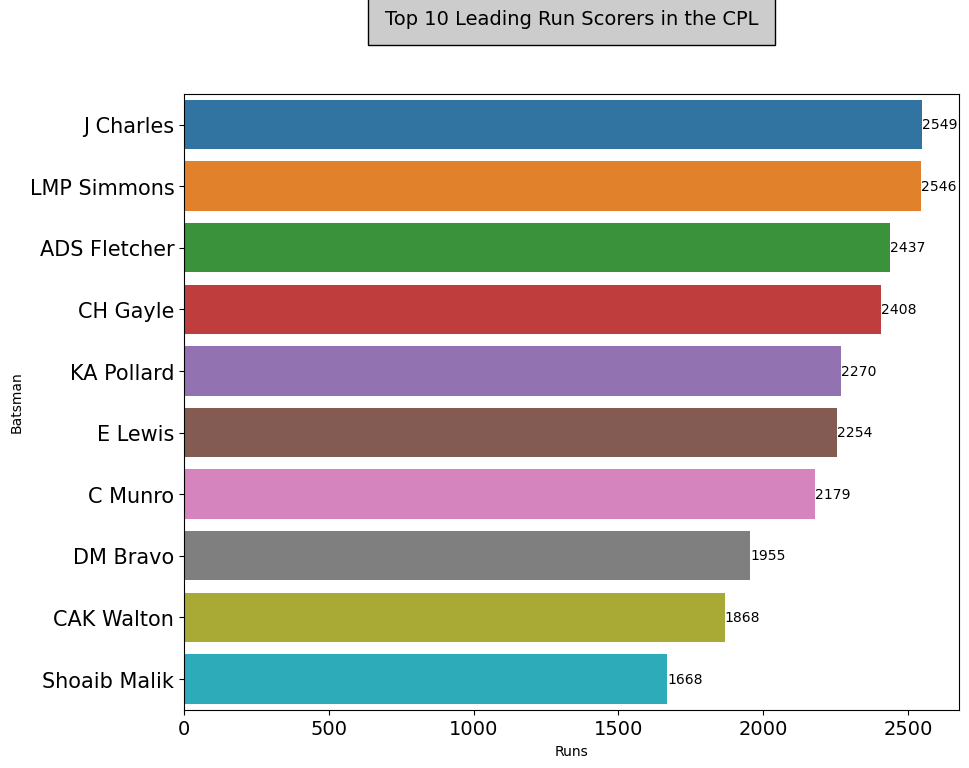

In [889]:
plt.figure(figsize=(10,8))

#Group by runs off the bat
batsman_runs = df.groupby(['striker'])['runs_off_bat'].sum()

#sort in descending order 
batsman_runs = batsman_runs.sort_values(ascending=False)[:10]


plt.title("Top 10 Leading Run Scorers in the CPL", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart4 = sns.barplot(y=batsman_runs.index,x=batsman_runs,orient='h')

bar_chart4.bar_label(bar_chart4.containers[0])

#Label Axes
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

batting_team
St Lucia Kings                 47.666667
St Kitts and Nevis Patriots    45.913580
Jamaica Tallawahs              44.409524
Trinbago Knight Riders         43.522523
Guyana Amazon Warriors         42.915888
Barbados Royals                42.656566
Antigua Hawksbills             38.800000
dtype: float64


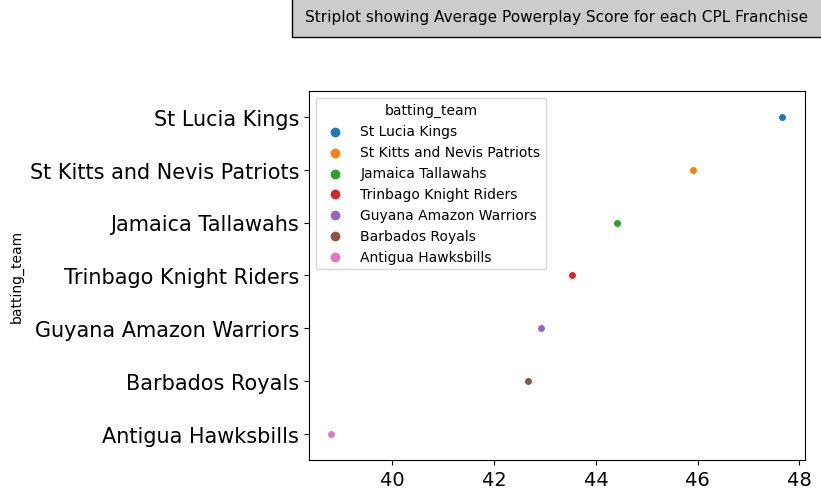

In [890]:
#Produce Average Powerplay runs by each Franchise in a pivot Table

#Get powerplay overs
pp_overs = df[df['overs'] < 7]

#Get runs scored in pp overs
pp_runs = (pp_overs.groupby(['match_id', 'batting_team']).sum()['runs_off_bat'] + 
     pp_overs.groupby(['match_id', 'batting_team']).sum()['extras'])

##Group runs by franchise
pp_runs = pp_runs.groupby('batting_team')

#Get mean pp runs for each franchise and sort in ascending order
avg_pp_runs = pp_runs.mean().sort_values(ascending=False)

plt.title("Striplot showing Average Powerplay Score for each CPL Franchise", bbox={'facecolor':'0.8', 'pad':6}, fontsize=11)

#Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric 
sns.stripplot(y=avg_pp_runs.index ,x=avg_pp_runs, hue=avg_pp_runs.index, data=avg_pp_runs)
print(avg_pp_runs)

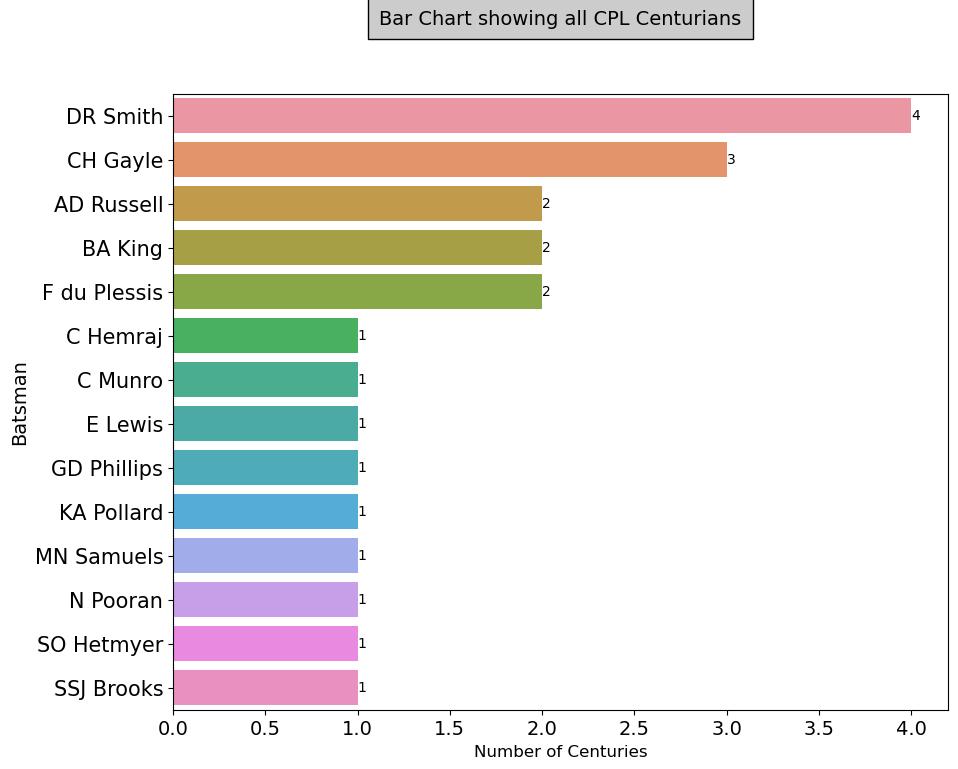

In [891]:
#Plot All CPL century- makers and number of centuries

plt.figure(figsize=(10,8))

#Get groups of batsman and amount of runs in each match
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()
#Filter for centuries
centurians = runs[runs >= 100].droplevel(level=1).groupby('striker')

centurians = centurians.count().sort_values(ascending=False)

plt.title("Bar Chart showing all CPL Centurians", bbox={'facecolor':'0.8', 'pad':4}, fontsize=14)

bar_chart5 = sns.barplot(y=centurians.index,x=centurians,orient='h')

bar_chart5.bar_label(bar_chart5.containers[0])

#Label Axes
plt.xlabel('Number of Centuries', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

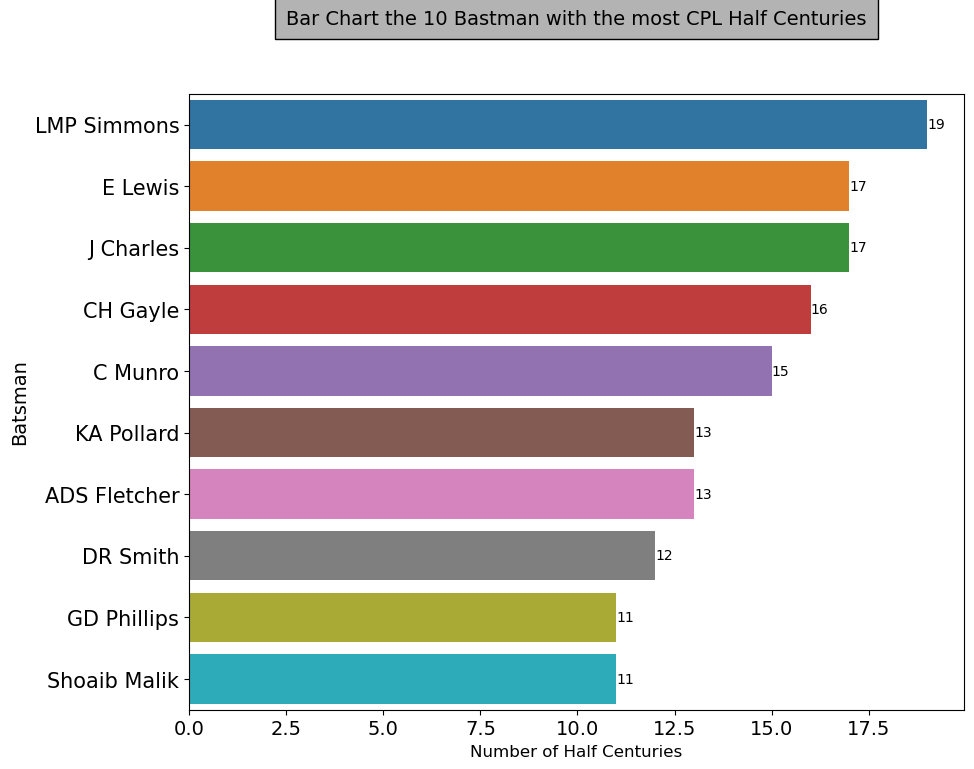

In [892]:
#Plot of the 10 Bastman with most CPL Half Centuries

plt.figure(figsize=(10,8))

#Get groups of batsman and amount of runs in each match
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()

#Filter for 50s
half_centurians = runs[runs >= 50].droplevel(level=1).groupby('striker')

half_centurians = half_centurians.count().sort_values(ascending=False)[:10]

plt.title("Bar Chart the 10 Bastman with the most CPL Half Centuries", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart6 = sns.barplot(y=half_centurians.index,x=half_centurians,orient='h')

bar_chart6.bar_label(bar_chart6.containers[0])

#Label Axes
plt.xlabel('Number of Half Centuries', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

In [893]:
#Players with the most runs each season

#Get runs for each player in every season
sum_data = df.groupby(['season','striker'])['runs_off_bat'].sum()

#Get seasons and max runs per season
season_max_runs = sum_data.groupby('season').max()

print("Players with the most runs each season:\n")
print("{0:10}{1:15}{2:1}".format("Season","Player","Runs"))

#traverse the season and runs dict (not really a dict)
#create a dataframe of sum of runs for each player per season
for season,run in season_max_runs.items():
    player = pd.DataFrame(sum_data).loc[season][pd.DataFrame(sum_data).loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t', run)

Players with the most runs each season:

Season    Player         Runs
2013 	  LMP Simmons 	 266
2014 	  LMP Simmons 	 414
2015 	  CH Gayle 	 430
2016 	  CH Gayle 	 425
2017 	  CAK Walton 	 458
2018 	  C Munro 	 567
2019 	  BA King 	 496
2020 	  LMP Simmons 	 356
2021 	  RL Chase 	 446
2022 	  BA King 	 422


In [894]:
#Top 10 Most runs scored by CPL players in a season in competition history 

#Get runs for each player in every season
sum_data = df.groupby(['season','striker'])['runs_off_bat'].sum()

#Take top 10 most run scorers from any season
top_ten = sum_data.sort_values(ascending=False)[:10]

print("Top 10 Most runs scored by CPL players in a season in competition history\n")
print(top_ten)


Top 10 Most runs scored by CPL players in a season in competition history

season  striker    
2018    C Munro        567
2019    BA King        496
2017    CAK Walton     458
2018    GD Phillips    457
2021    RL Chase       446
2018    SO Hetmyer     440
2019    LMP Simmons    431
2015    CH Gayle       430
2021    E Lewis        426
2016    CH Gayle       425
Name: runs_off_bat, dtype: int64


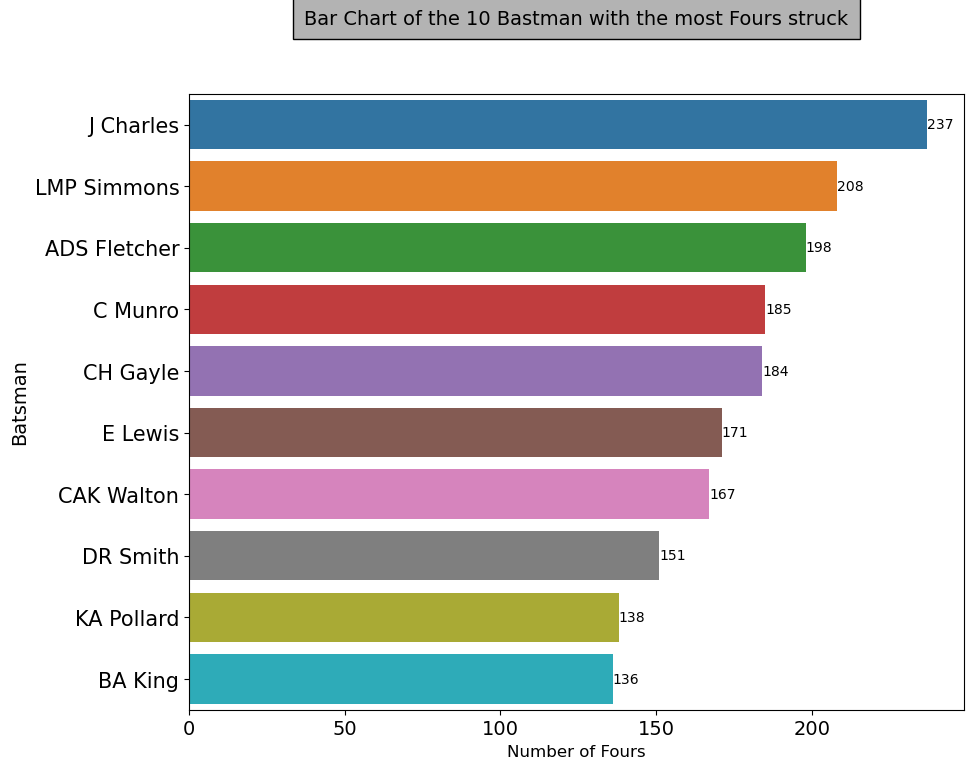

In [895]:
#10 Bastman with the most Fours struck
plt.figure(figsize=(10,8))

four_strikers = df[df['runs_off_bat'] == 4]['striker']

four_strikers = four_strikers.value_counts()[:10]

plt.title("Bar Chart of the 10 Bastman with the most Fours struck", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart7 = sns.barplot(y=four_strikers.index,x=four_strikers,orient='h')

bar_chart7.bar_label(bar_chart7.containers[0])

#Label Axes
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

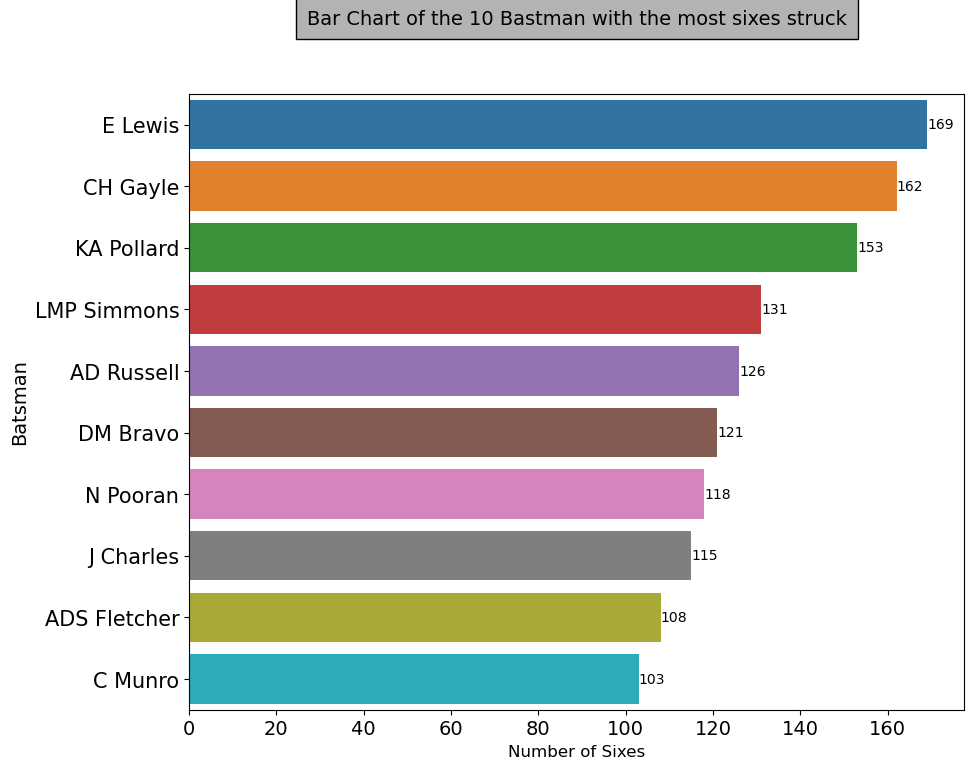

In [896]:
#10 Bastman with the most Sixes struck
plt.figure(figsize=(10,8))

six_strikers = df[df['runs_off_bat'] == 6]['striker']

six_strikers = six_strikers.value_counts()[:10]

plt.title("Bar Chart of the 10 Bastman with the most sixes struck", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart8 = sns.barplot(y=six_strikers.index,x=six_strikers,orient='h')

bar_chart8.bar_label(bar_chart8.containers[0])

#Label Axes
plt.xlabel('Number of Sixes', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

In [ ]:
df.sum()['runs_off_bat'].droplevel(level=0).sort_values(ascending=False)[:10]
